This lab is an introduction to audio and image processing. You will be learning how to use some Python packages that are commonly used in these domains. Part 1 deals will audio, and part 2 will be on images.

# Part 1 - Loading and Visualizing Digital Audio

In [1]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

Sound is minute pressure changes in the medium it it travelling in, this pressure change is measured by a microphone and converted into signal levels. The most direct way to visualize this captured information is to plot out these values directly.

In [2]:
Fs, wav = wavfile.read('data/chopin.wav')

Plotting the audio signal

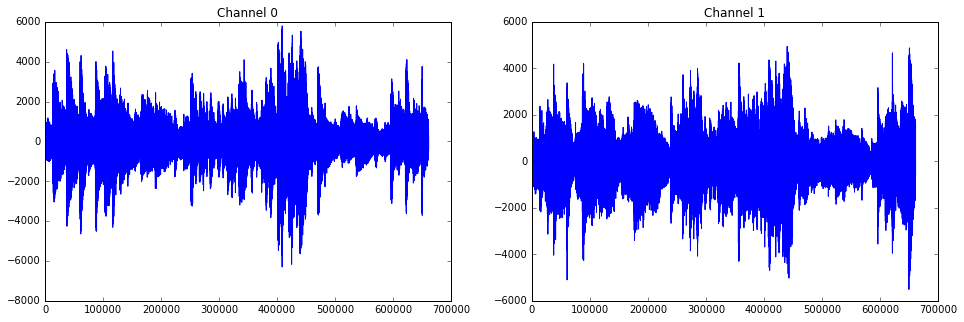

In [3]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(wav[:,0]);
plt.title('Channel 0')

plt.subplot(1, 2, 2)
plt.plot(wav[:,1]);
plt.title('Channel 1')

## Exercise 1 - Baby steps

1. Write a function to compute the length of the audio file in seconds
2. Write a function to plot out short section of the audio clip instead of the whole length

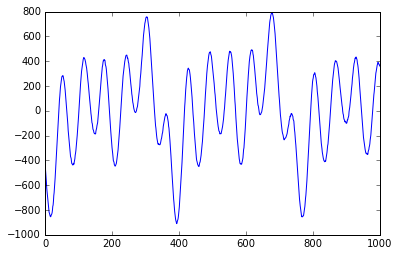

In [4]:
def audioLength(signal, samplingRate):
    #signal is a single channel of the audio file, samplingRate is the, well, the sampling rate of the signal
    #If you are lost here, check the documentation for scipy.io.wavefile :)
    #your code here
    return signal.size()/ samplingRate 
#    pass

def getWindow(signal, (start, end), windowFunc=None):
    #ignore windowFunc for now
    #signal is a single channel of your audio file
    #The function should return the signal values from [start,end), the value indexed by end is excluded
    #your code here
    return signal[start:end]
    # pass
     
plt.plot(getWindow(wav[:,0], (0, 1000))) 

## Better Visualization

It is difficult to see what's happening in the audio signal from the plots above. To analyze audio content, in applications such as speaker recognition or audio content identification, a necessary tool is the **spectrogram**. The spectrogram can be used to visualize the frequency content of the audio signal as it progresses over time.

Mathematically, the spetrogram is the **squared-magnitude** of 
the Fourier transform of overlapping segments, or windows, of the audio signal.
To generate the spectrogram, the signal must first be separated into
overlapping segments. If we denote the signal as 
$\vec{x} = [x_{0}, x_{1},..., x_{N-1}]$, a one-dimensional vector of $N$ samples,
Then the segments would be given as
$$ 
\vec{x}_{0}=[x_{0}, x_{1},..., x_{N}],\\
\vec{x}_{1}=[x_{M}, x_{M+1},..., x_{M+N}],\\
\vdots\\
\vec{x}_{i}=[x_{iM}, x_{iM + 1},..., x_{iM+N}],
$$
where $M$ is the step size between windows
and $N$ is the length of each window. To generate a smoother spectrogram,
it is common to multiply the windows element-wise with a 
*windowing filter* $\vec{w}$. A popular choice of a window
filter is the Hamming window.

### Windowing Functions

Using hard cut-offs at the boundaries of the windows can cause various undesirable artifacts. In order to reduce these effects, windowing functions can be applied to these rectangular clips. Numpy provides `hamming()` to generate what is known as the Hamming window. We apply this window to the signal we obtained above by performing an elementwise multiplication.

Note:
Not multiplying the signal by any fancy windowing function is sometimes called the rectangular window.

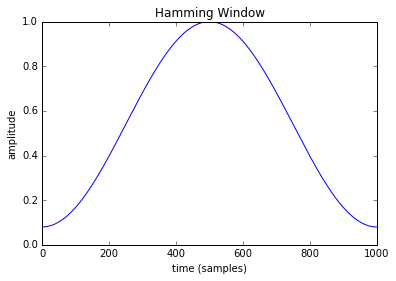

In [5]:
N = 1000
w = np.hamming(N)      # generate a Hamming window of length N
s = wav[0:N, 0] # how many samples does s have? N or N+1? 
# It has N samples, python array slices are exclusive

plt.figure()
plt.plot(w) # plot the window
plt.title('Hamming Window')
ax = plt.axes()
ax.set_xlabel('time (samples)')
ax.set_ylabel('amplitude')

### Exercise 2

Now modify the definition of your `getWindow()` function, it should now apply the hamming window to the signal that was obtained.

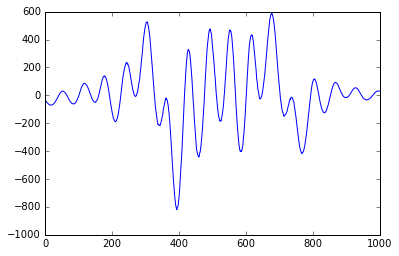

In [6]:
def getWindow(signal, (start, end), windowFunc=None):
    #signal is a single channel of your audio file
    #The function should return the signal values from [start,end), the value indexed by end is excluded
    #windowFunc should be a function that will generate a window function, here we will just pass in np.hamming
    #your code here
    if windowFunc == None:
        return signal[start:end]
    return signal[start:end] * windowFunc(end-start)
   # pass

plt.plot(getWindow(wav[:,0], (0, 1000), np.hamming))

### Fourier Transform

Applying a Fourier Transform to a signal allows us to view it's frequency content.

To generate the frequency content for the spectrogram, the **Fourier transform** is applied
to the windowed segments of the input and the magnitude of the result is squared
and stored,

$$\vec{f}_{i} = \left\|\mathcal{FFT}\left(\vec{w}\odot \vec{x}_{i}\right)\right\|^{2},$$

where $\odot$ represents elementwise multiplication. Note that the Fourier transform
produces both negative and positive frequencies, but the content of the negative frequencies are
redundant, since the spectrogram stores the *magnitude* of the FT result and we are dealing
with *real* signals. Therefore, only $\vec{f}_{i,[0:N/2 + 1]}$ is needed. The function **rfft()** takes
care of this for you.

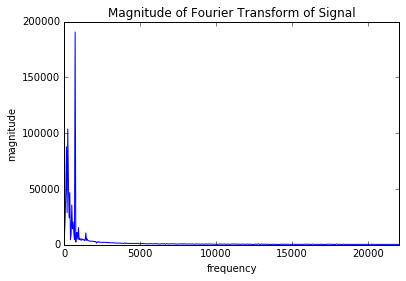

In [7]:
f = np.fft.rfft(s)                   # Fourier transform of signal, keeping only the positive frequencies

freq = np.arange(f.size)*(Fs/2.)/f.size    # generate frequencies for plot

plt.plot(freq, np.absolute(f))
plt.title('Magnitude of Fourier Transform of Signal')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,22050);

### Exercise 3

1. What's the length of `f` in the code segment above? Why?
1. Plot only the initial parts of the Fourier Transform, give a brief description/explanantion of what you see.
1. Plot the frequency content of a rectangular window and a Hamming window.
2. Give a brief description of the differences between these windows.
1. Plot the FFT of a window of the signal using the rectangular window and one with a hamming window. Describe what you see briefly.

For the plots, you might want to play with the scales on the axis to see better

In [8]:
#Q1
print " 1. 500 (Actually 501 because of the way rfft works ) is the length of f in the above code segment" 
print "    because s has a 1000 and the lower half is ignored because we are doing magnitude \n"

 1. 500 (Actually 501 because of the way rfft works ) is the length of f in the above code segment
    because s has a 1000 and the lower half is ignored because we are doing magnitude 



 2. Plot of initial parts of the Fourier Transform, we can see 1 major peak and a few minor peaks, and then no other peak 
  


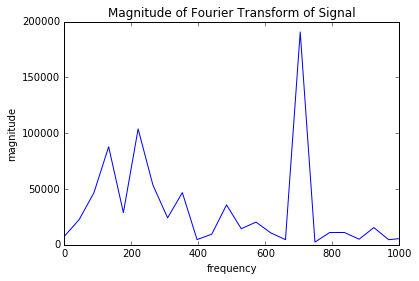

In [9]:
#Q2
print " 2. Plot of initial parts of the Fourier Transform, we can see 1 major peak and a few minor peaks, and then no other peak \n  "
plt.plot(freq, np.absolute(f))
plt.title('Magnitude of Fourier Transform of Signal')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1000);


3. The plot of the hamming window: 


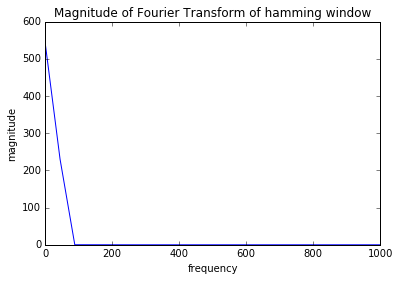

In [10]:

#Q3 
print "3. The plot of the hamming window: "
f_ham = np.fft.rfft(np.hamming(1000))                   # Fourier transform of signal, keeping only the positive frequencies
freq = np.arange(f.size)*(Fs/2.)/f_ham.size             # generate frequencies for plot
plt.plot(freq, np.absolute(f_ham))
plt.title('Magnitude of Fourier Transform of hamming window')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1000);


 
 The plot of the rectangular window: 


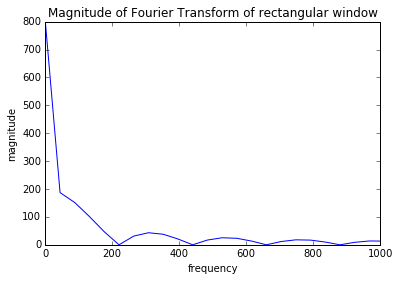

In [11]:
#Q3 continued
print " \n The plot of the rectangular window: "
temp = np.zeros(100)
temp = np.append(temp,np.ones(800))
temp = np.append(temp,np.zeros(100))
f_rec = np.fft.rfft(temp)                   # Fourier transform of signal, keeping only the positive frequencies
freq = np.arange(f.size)*(Fs/2.)/f_rec.size             # generate frequencies for plot
plt.plot(freq, np.absolute(f_rec))
plt.title('Magnitude of Fourier Transform of rectangular window')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1000);

In [12]:
#Q4 
print " \n 4. The peak is higher and the graph is steeper of the rectangular window , and there are multiple peaks, "
print " \b   whereas the Hamming window just has a single peak."

 
 4. The peak is higher and the graph is steeper of the rectangular window , and there are multiple peaks, 
    whereas the Hamming window just has a single peak.


3. The plot of signal through the hamming window: 


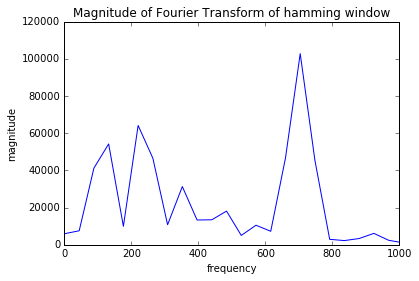

In [13]:
#Q5
print "3. The plot of signal through the hamming window: "
f_ham = np.fft.rfft(getWindow(wav[:,0], (0, 1000), np.hamming))                   # Fourier transform of signal, keeping only the positive frequencies
freq = np.arange(f.size)*(Fs/2.)/f_ham.size             # generate frequencies for plot
plt.plot(freq, np.absolute(f_ham))
plt.title('Magnitude of Fourier Transform of hamming window')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1000);

5. Continued: 
 The plot of signal through the rectangular window: 


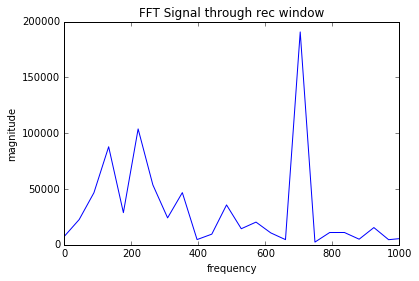

In [14]:
print "5. Continued: \n The plot of signal through the rectangular window: "
f_rec = np.fft.rfft(getWindow(wav[:,0], (0, 1000), np.ones))                   # Fourier transform of signal, keeping only the positive frequencies
freq = np.arange(f.size)*(Fs/2.)/f_rec.size             # generate frequencies for plot
plt.plot(freq, np.absolute(f_rec))
plt.title('FFT Signal through rec window')
ax = plt.axes()
ax.set_xlabel('frequency')
ax.set_ylabel('magnitude')
ax.set_xlim(0,1000);

In [15]:
print "\n 5. Continued: The signal through the rectangular window has sharper and higher peaks as compared to the"
print "               signal through the hamming window"


 5. Continued: The signal through the rectangular window has sharper and higher peaks as compared to the
               signal through the hamming window


### Frequency Domain Visualization

Here we will utilize a built in function in matplotlib to plot the spectrogram of the audio signal. The spectrogram is computed from a overlapping sliding window of the audio signal, with the windowing function applied. This is typically called the Short Time Fourier Transform(STFT) of the audio signal. Each column in the plot represents a window of the signal, the y-axis represents the frequency and the color represents the magnitude.

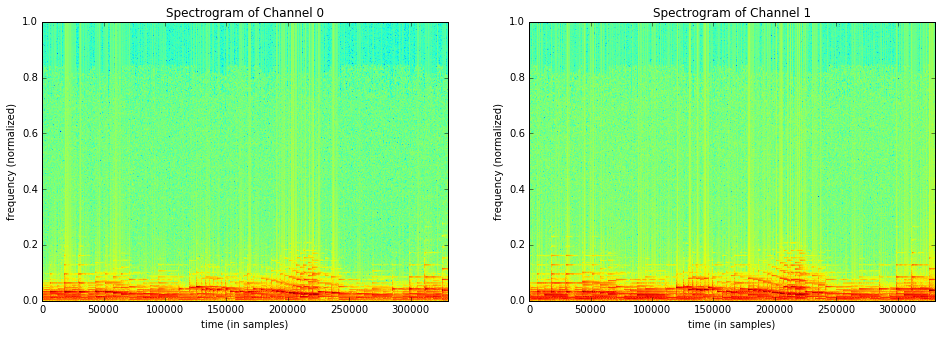

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2) # create plot
fig.set_size_inches(16, 5)

N=1024
M=128

# generate & plot spectrogram (built-in function)
data, freqs, bins, im = ax1.specgram(wav[:,0], NFFT=N, noverlap=(N-M), window = np.hamming(N))   
ax1.axis('tight')
ax1.set_title('Spectrogram of Channel 0')
ax1.set_ylabel('frequency (normalized)')
ax1.set_xlabel('time (in samples)')

data, freqs, bins, im = ax2.specgram(wav[:,1], NFFT=N, noverlap=(N-M), window = np.hamming(N))   
ax2.axis('tight')
ax2.set_title('Spectrogram of Channel 1')
ax2.set_ylabel('frequency (normalized)')
ax2.set_xlabel('time (in samples)')

## Exercise 4

3. Looking at the spectrograms above, are you able to make some judgement on what's going on in the audio file without listening to it?
4. Now listen to the provided wav file, are you able to gain make an educated guess at what the sound would be by looking at the spectrogram? Describe briefly.

In [17]:
#1
print "1. Yes, I can judge that most of the audio file is in the 0 to 0.2 frequency range, and that the channels"
print "   sound very similar to each other"
#2
print "\n 2. I can tell the difference between what the sound would be when looking at the bigger differences, but the "
print "    tinier differences are harder to tell apart "



1. Yes, I can judge that most of the audio file is in the 0 to 0.2 frequency range, and that the channels
   sound very similar to each other

 2. I can tell the difference between what the sound would be when looking at the bigger differences, but the 
    tinier differences are harder to tell apart 


# Part 2 - Digital Images

In this part, we will be looking at digital image representation

In [18]:
from PIL import Image

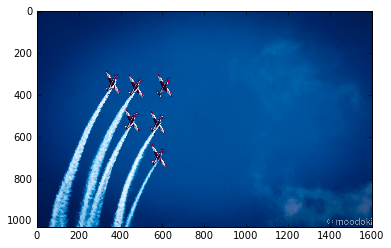

In [19]:
# Read in the image file and convert it into a numpy array
img = np.array(Image.open('data/roulettes.jpg'))

plt.imshow(img)

## Exercise 5

1. What is the shape of the array? What does each dimension represent?
2. Generate plots of each channel seperately. Briefly describe what you see in each plot
3. Propose a method of segmenting the planes from the sky. (You can just describe in words. Implementation is not required. (Extra credit))
4. What is the size of the JPEG file provided? Recall that an image is suppose to be made of pixels and each pixels is about 3 bytes. Does this add up? Explain briefly.

In [20]:
print  "1. ",img.shape, "is the shape, dim 0 and 1 are the height and width respectively, dim 2 is the colors channels "

1.  (1029L, 1600L, 3L) is the shape, dim 0 and 1 are the height and width respectively, dim 2 is the colors channels 



 2.: Red:


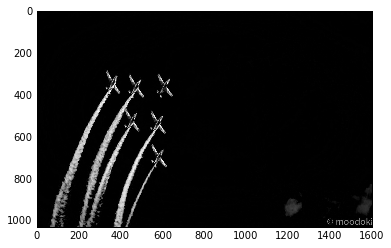

In [21]:
print "\n 2.: Red:"
red = img[:,:,0]
plt.imshow(red,plt.cm.gray)


 2. Continue: Green


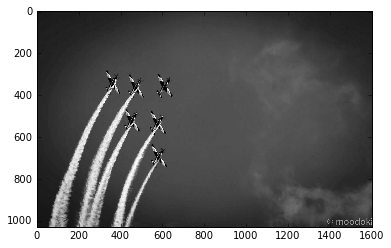

In [22]:
print "\n 2. Continue: Green"
green = img[:,:,1]
plt.imshow(green,plt.cm.gray)


 2. Continue: Blue


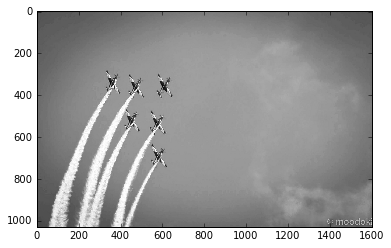

In [23]:
print "\n 2. Continue: Blue"
green = img[:,:,2]
plt.imshow(green,plt.cm.gray)


 3. To segment, we could just set the blue and green to 0 as the planes are distincly red, as follows:


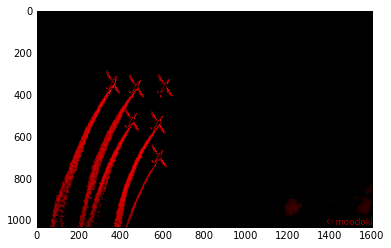

In [24]:
print "\n 3. To segment, we could just set the blue and green to 0 as the planes are distincly red, as follows:"
sky_out = np.copy(img)
sky_out[:,:,2] = 0
sky_out[:,:,1] = 0
plt.imshow(sky_out)

In [25]:
print img.size*0.008, "is the represented size in python"
print "4.The image size on the disk is 359.9 Kb, but the file here is 395.14 Kb, which suggests that the system "
print "  uses some sort of compression that is not replicated here"

39513.6 is the represented size in python
4.The image size on the disk is 359.9 Kb, but the file here is 395.14 Kb, which suggests that the system 
  uses some sort of compression that is not replicated here
